## Day - 1: The XOR Problem

In [1]:
# !pip3 install numpy matplotlib scikit-learn

In [2]:
# !pip3 install tensorflow

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

2025-04-17 11:02:06.999841: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 11:02:07.314702: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 11:02:07.318596: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-17 11:02:08.372757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
# Standard 2D XOR data
def generate_xor_data(n_samples=100, noise=0.1, dim=2):
    if dim < 2:
        raise ValueError("Dimension must be at least 2")
    X = np.random.rand(n_samples, dim)
    y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5).astype(int)
    if noise > 0:
        flip_indices = np.random.choice(n_samples, int(noise * n_samples), replace=False)
        y[flip_indices] = 1 - y[flip_indices]
    
    return X, y
X_2d, y_2d = generate_xor_data(n_samples=200, noise=0.05, dim=2)

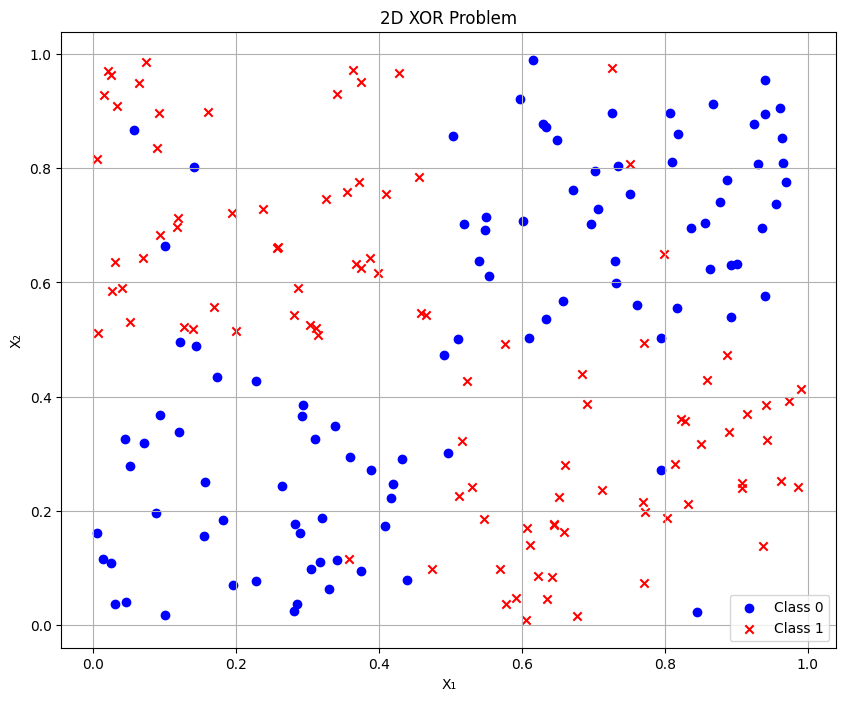

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[y_2d == 0, 0], X_2d[y_2d == 0, 1], c='blue', marker='o', label='Class 0')
plt.scatter(X_2d[y_2d == 1, 0], X_2d[y_2d == 1, 1], c='red', marker='x', label='Class 1')
plt.xlabel('X₁')
plt.ylabel('X₂')
plt.title('2D XOR Problem')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def plot_decision_boundary(model, X, y, title):
    # mesh grid creation
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='o', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='x', label='Class 1')
    plt.xlabel('X₁')
    plt.ylabel('X₂')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

### Approach 1: Single-layer perceptron (linear model)


2025-04-17 11:02:09.686195: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-17 11:02:09.923264: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


7/7 [==============================] - 0s 969us/step
Linear model accuracy: 0.5500
113/113 [==============================] - 0s 621us/step


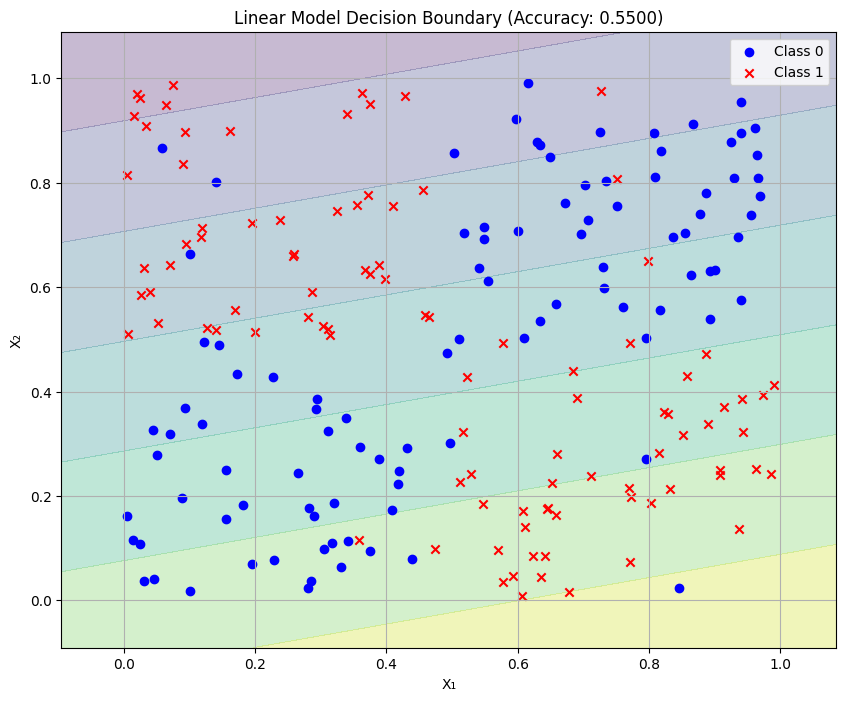

In [8]:
def linear_model():
    model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(2,))
    ])
    model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_2d, y_2d, epochs=100, verbose=0)
    return model

linear_model_xor = linear_model()
linear_predictions = (linear_model_xor.predict(X_2d) > 0.5).astype(int).flatten()
linear_accuracy = accuracy_score(y_2d, linear_predictions)
print(f"Linear model accuracy: {linear_accuracy:.4f}")

plot_decision_boundary(linear_model_xor, X_2d, y_2d, f"Linear Model Decision Boundary (Accuracy: {linear_accuracy:.4f})")

### Approach 2: Manual feature engineering


<Figure size 1000x800 with 0 Axes>

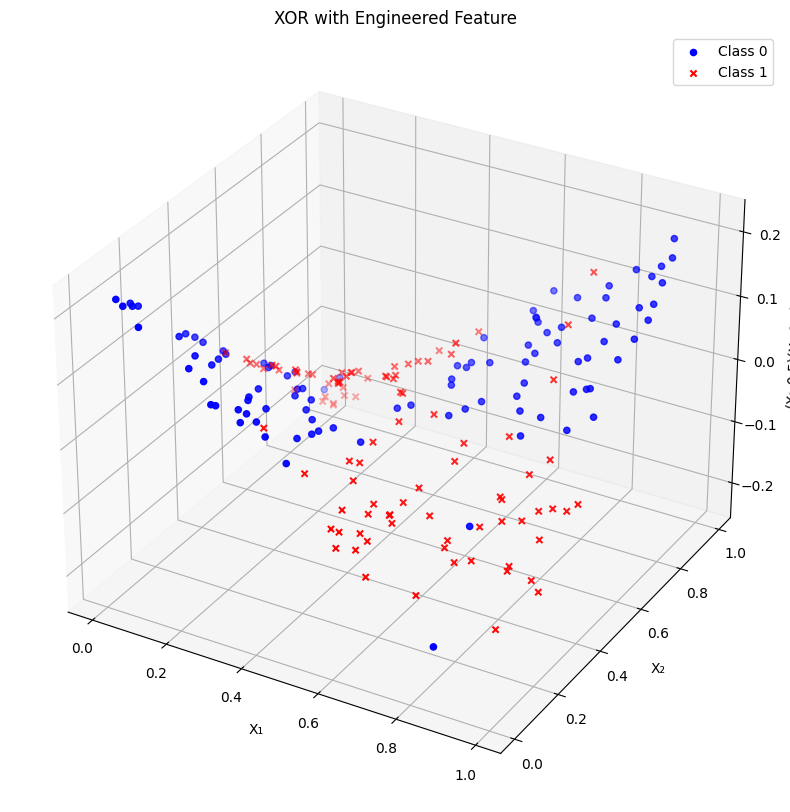

7/7 [==============================] - 0s 1ms/step
Linear model with engineered features accuracy: 0.8150


In [ ]:
def feature_engineering(X):
    feature = np.zeros((X.shape[0], 1))
    # Feature: (x1 - 0.5)*(x2 - 0.5) captures XOR pattern
    feature[:, 0] = (X[:, 0] - 0.5) * (X[:, 1] - 0.5)
    return np.hstack([X, feature])

X_2d_engineered = feature_engineering(X_2d)

# 3D plot of engineered features
plt.figure(figsize=(10, 8))
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_2d_engineered[y_2d == 0, 0], X_2d_engineered[y_2d == 0, 1], X_2d_engineered[y_2d == 0, 2], 
           c='blue', marker='o', label='Class 0')
ax.scatter(X_2d_engineered[y_2d == 1, 0], X_2d_engineered[y_2d == 1, 1], X_2d_engineered[y_2d == 1, 2], 
           c='red', marker='x', label='Class 1')
ax.set_xlabel('X₁')
ax.set_ylabel('X₂')
ax.set_zlabel('(X₁-0.5)(X₂-0.5)')
ax.set_title('XOR with Engineered Feature')
ax.legend()
plt.show()

def linear_model_with_engineered_features():
    model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(3,))
    ])
    model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_2d_engineered, y_2d, epochs=100, verbose=0)
    return model

engineered_model = linear_model_with_engineered_features()
engineered_predictions = (engineered_model.predict(X_2d_engineered) > 0.5).astype(int).flatten()
engineered_accuracy = accuracy_score(y_2d, engineered_predictions)
print(f"Linear model with engineered features accuracy: {engineered_accuracy:.4f}")

### Approach 3: Shallow neural network (MLP with one hidden layer)


7/7 [==============================] - 0s 987us/step
Shallow neural network accuracy: 0.8150
113/113 [==============================] - 0s 719us/step


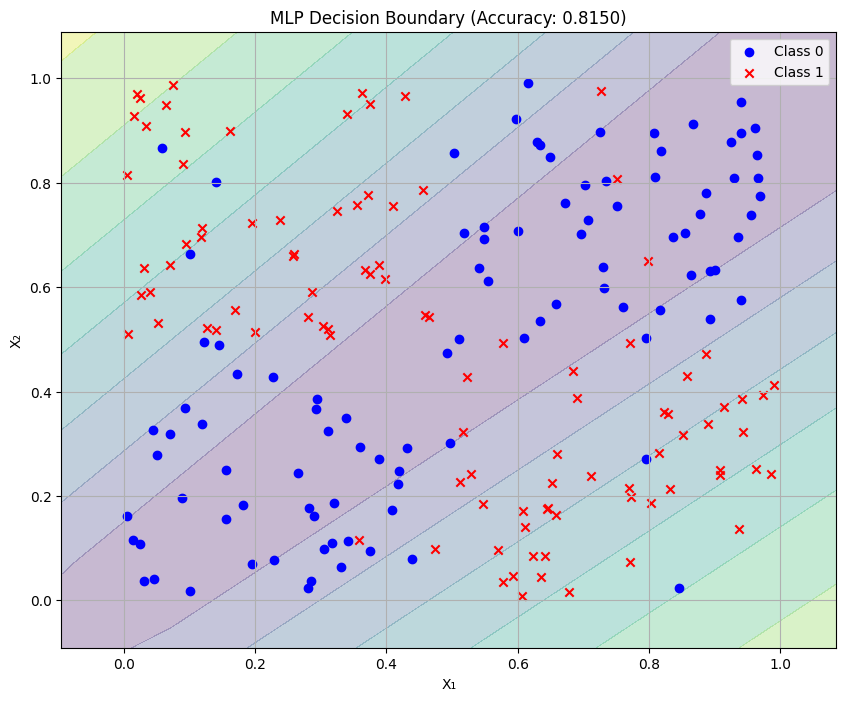

In [10]:
def shallow_neural_network():
    model = Sequential([
        Dense(4, activation='relu', input_shape=(2,)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_2d, y_2d, epochs=100, verbose=0)
    return model

mlp_model = shallow_neural_network()
mlp_predictions = (mlp_model.predict(X_2d) > 0.5).astype(int).flatten()
mlp_accuracy = accuracy_score(y_2d, mlp_predictions)
print(f"Shallow neural network accuracy: {mlp_accuracy:.4f}")

plot_decision_boundary(mlp_model, X_2d, y_2d, f"MLP Decision Boundary (Accuracy: {mlp_accuracy:.4f})")


Training models for 3 dimensions...
16/16 [==============================] - 0s 1ms/step
Dimension 3:
  Linear model accuracy: 0.5120
  Engineered features accuracy: 0.8280
  MLP accuracy: 0.7120

Training models for 4 dimensions...
16/16 [==============================] - 0s 1ms/step
Dimension 4:
  Linear model accuracy: 0.5440
  Engineered features accuracy: 0.7800
  MLP accuracy: 0.5220

Training models for 5 dimensions...
16/16 [==============================] - 0s 826us/step
Dimension 5:
  Linear model accuracy: 0.5300
  Engineered features accuracy: 0.8260
  MLP accuracy: 0.6520

Training models for 6 dimensions...
16/16 [==============================] - 0s 1ms/step
Dimension 6:
  Linear model accuracy: 0.5260
  Engineered features accuracy: 0.7620
  MLP accuracy: 0.6000

Training models for 7 dimensions...
16/16 [==============================] - 0s 779us/step
Dimension 7:
  Linear model accuracy: 0.5540
  Engineered features accuracy: 0.8080
  MLP accuracy: 0.6000

Training m

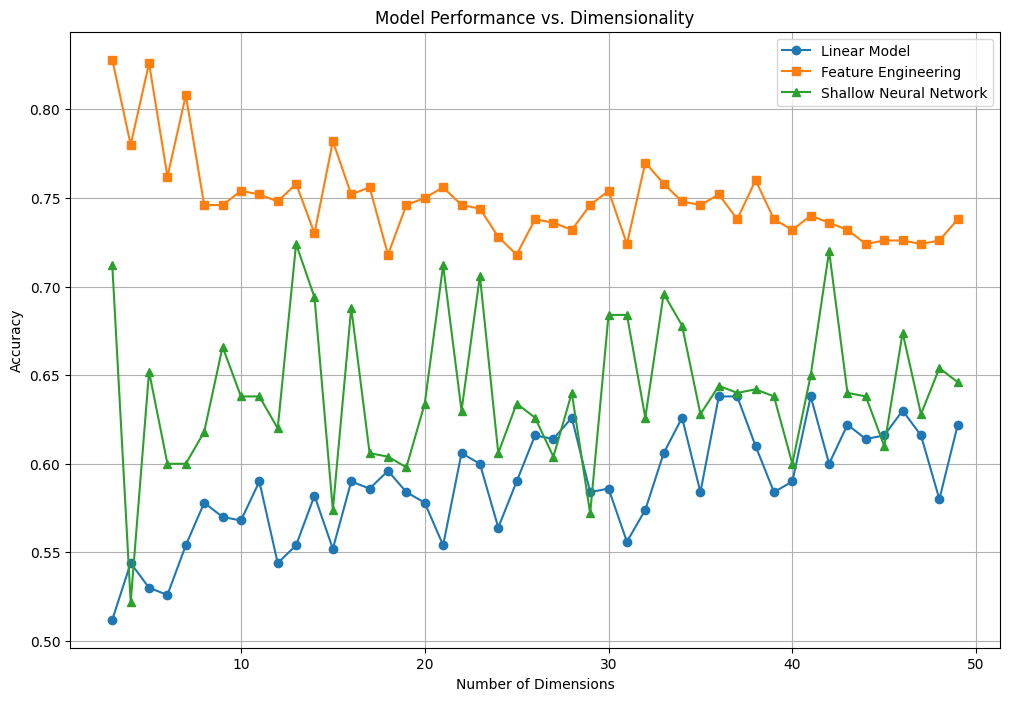

In [ ]:
# Extending to explore higher dimensions
def explore_higher_dimensions():
    dimensions = range(3, 50)
    linear_accuracies = []
    engineered_accuracies = []
    mlp_accuracies = []
    
    for dim in dimensions:
        print(f"\nTraining models for {dim} dimensions...")
        X, y = generate_xor_data(n_samples=500, noise=0.05, dim=dim)
        
        # 1. Linear model
        linear = Sequential([
            Dense(1, activation='sigmoid', input_shape=(dim,))
        ])
        linear.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
        linear.fit(X, y, epochs=100, verbose=0)
        linear_pred = (linear.predict(X) > 0.5).astype(int).flatten()
        linear_acc = accuracy_score(y, linear_pred)
        linear_accuracies.append(linear_acc)
        
        # 2. Feature engineering
        X_eng = np.hstack([X, np.reshape((X[:, 0] - 0.5) * (X[:, 1] - 0.5), (-1, 1))])
        
        eng_model = Sequential([
            Dense(1, activation='sigmoid', input_shape=(dim+1,))
        ])
        eng_model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
        eng_model.fit(X_eng, y, epochs=100, verbose=0)
        eng_pred = (eng_model.predict(X_eng) > 0.5).astype(int).flatten()
        eng_acc = accuracy_score(y, eng_pred)
        engineered_accuracies.append(eng_acc)
        
        # 3. MLP model
        # Adding more hidden units to increase capacity
        mlp = Sequential([
            Dense(4, activation='relu', input_shape=(dim,)),
            Dense(1, activation='sigmoid')
        ])
        mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        mlp.fit(X, y, epochs=100, verbose=0)
        mlp_pred = (mlp.predict(X) > 0.5).astype(int).flatten()
        mlp_acc = accuracy_score(y, mlp_pred)
        mlp_accuracies.append(mlp_acc)
        
        print(f"Dimension {dim}:")
        print(f"  Linear model accuracy: {linear_acc:.4f}")
        print(f"  Engineered features accuracy: {eng_acc:.4f}")
        print(f"  MLP accuracy: {mlp_acc:.4f}")
    
    # Plot results
    plt.figure(figsize=(12, 8))
    plt.plot(dimensions, linear_accuracies, 'o-', label='Linear Model')
    plt.plot(dimensions, engineered_accuracies, 's-', label='Feature Engineering')
    plt.plot(dimensions, mlp_accuracies, '^-', label='Shallow Neural Network')
    plt.xlabel('Number of Dimensions')
    plt.ylabel('Accuracy')
    plt.title('Model Performance vs. Dimensionality')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return dimensions, linear_accuracies, engineered_accuracies, mlp_accuracies

dimensions, linear_acc, engineered_acc, mlp_acc = explore_higher_dimensions()



### Result Analysis

In [12]:
print("\n=== Final Analysis ===")
print("Performance Summary:")
for i, dim in enumerate(dimensions):
    print(f"Dimension {dim}:")
    print(f"  Linear model: {linear_acc[i]:.4f}")
    print(f"  Feature engineering: {engineered_acc[i]:.4f}")
    print(f"  Neural network: {mlp_acc[i]:.4f}")
    print()


=== Final Analysis ===
Performance Summary:
Dimension 3:
  Linear model: 0.5120
  Feature engineering: 0.8280
  Neural network: 0.7120

Dimension 4:
  Linear model: 0.5440
  Feature engineering: 0.7800
  Neural network: 0.5220

Dimension 5:
  Linear model: 0.5300
  Feature engineering: 0.8260
  Neural network: 0.6520

Dimension 6:
  Linear model: 0.5260
  Feature engineering: 0.7620
  Neural network: 0.6000

Dimension 7:
  Linear model: 0.5540
  Feature engineering: 0.8080
  Neural network: 0.6000

Dimension 8:
  Linear model: 0.5780
  Feature engineering: 0.7460
  Neural network: 0.6180

Dimension 9:
  Linear model: 0.5700
  Feature engineering: 0.7460
  Neural network: 0.6660

Dimension 10:
  Linear model: 0.5680
  Feature engineering: 0.7540
  Neural network: 0.6380

Dimension 11:
  Linear model: 0.5900
  Feature engineering: 0.7520
  Neural network: 0.6380

Dimension 12:
  Linear model: 0.5440
  Feature engineering: 0.7480
  Neural network: 0.6200

Dimension 13:
  Linear model: 0.